# Exploratory Data Analysis on Terrorism
Perform ‘Exploratory Data Analysis’ on dataset ‘Global Terrorism’
- As a security/defense analyst, try to find out the hot zone of terrorism.
- What all security issues and insights you can derive by EDA?

Made By: Raghu Madhav Tiwari

In [1]:
# importing the necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# importing the dataset
df=pd.read_csv("globalterrorismdb_0718dist.csv")
pd.set_option('display.max_columns', None)
df.head()

C:\Users\Raghu\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0,Dominican Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MANO-D,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23rd of September Communist League,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives,16.0,Unknown Explosive Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN

### Understanding the Data

In [3]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 135 columns):
 #    Column              Dtype  
---   ------              -----  
 0    eventid             int64  
 1    iyear               int64  
 2    imonth              int64  
 3    iday                int64  
 4    approxdate          object 
 5    extended            int64  
 6    resolution          object 
 7    country             int64  
 8    country_txt         object 
 9    region              int64  
 10   region_txt          object 
 11   provstate           object 
 12   city                object 
 13   latitude            float64
 14   longitude           float64
 15   specificity         float64
 16   vicinity            int64  
 17   location            object 
 18   summary             object 
 19   crit1               int64  
 20   crit2               int64  
 21   crit3               int64  
 22   doubtterr           float64
 23   alternative         float64
 24 

In [4]:
# change column names
df=df[["eventid","iyear","imonth","iday","country_txt","region_txt","provstate","city","latitude","longitude","attacktype1_txt","targtype1_txt","weaptype1_txt","nkill","ishostkid"]]
columns={"iyear":'year',"imonth":"month","country_txt":"country","region_txt":"region","attacktype1_txt":"attacktype","targtype1_txt":"target_type","weaptype1_txt":"weapon_type","nkill":"number_of_kills"}
df.rename(columns=columns, inplace=True)
df.head()

,eventid,year,month,iday,country,region,provstate,city,latitude,longitude,attacktype,target_type,weapon_type,number_of_kills,ishostkid
0,197000000001,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,Assassination,Private Citizens & Property,Unknown,1.0,0.0
1,197000000002,1970,0,0,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),Government (Diplomatic),Unknown,0.0,1.0
2,197001000001,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,Assassination,Journalists & Media,Unknown,1.0,0.0
3,197001000002,1970,1,0,Greece,Western Europe,Attica,Athens,37.997490,23.762728,Bombing/Explosion,Government (Diplomatic),Explosives,NaN,0.0
4,197001000003,1970,1,0,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,Government (Diplomatic),Incendiary,NaN,0.0


In [5]:
df.shape

(181691, 15)

In [6]:
df.isnull().sum()

eventid                0
year                   0
month                  0
iday                   0
country                0
region                 0
provstate            421
city                 434
latitude            4556
longitude           4557
attacktype             0
target_type            0
weapon_type            0
number_of_kills    10313
ishostkid            178
dtype: int64

In [7]:
# drop redundant columns
df.dropna(axis=0,how="any",inplace=True,subset=["provstate","city","ishostkid"])

In [8]:
# handling missing data in "Number of kills" column
df["number_of_kills"]=df["number_of_kills"].fillna(df["number_of_kills"].mean())

### Analysis on Data

<AxesSubplot:xlabel='year', ylabel='Count'>

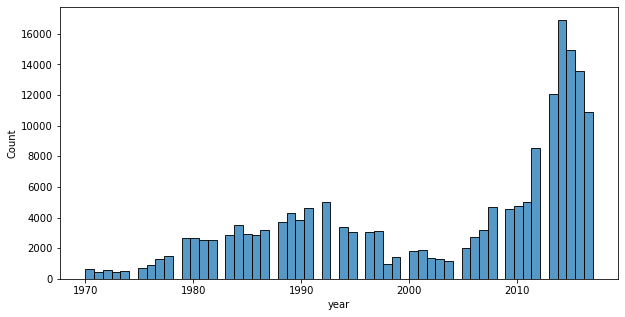

In [9]:
# yearwise counts
fig = plt.figure(figsize=(10, 5))
sns.histplot(data=df,x="year")

Most terrorism acts occur after the year 2010

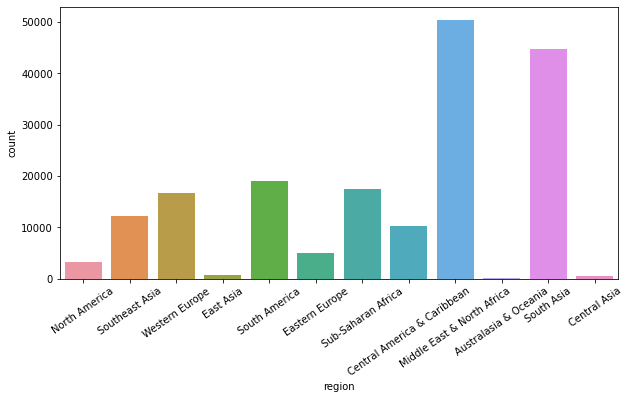

In [10]:
# regionwise counts
fig = plt.figure(figsize=(10, 5))
g=sns.countplot(data=df,x="region")
plt.xticks(rotation=35)
plt.show()

Most terrorism acts occur in region "Central America and Caribbean" 
(later we observe that there are little cauaslities in this region)

In [11]:
df["number_of_kills"].value_counts()[:10]

0.000000     87643
1.000000     36301
2.000000     14063
2.407072     10273
3.000000      7700
4.000000      4941
5.000000      3551
6.000000      2549
7.000000      1952
8.000000      1490
10.000000     1184
Name: number_of_kills, dtype: int64

<AxesSubplot:>

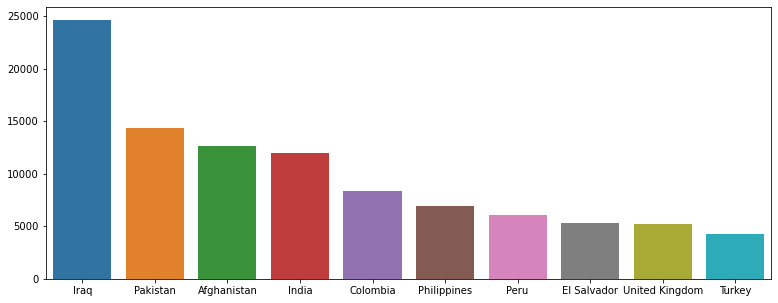

In [12]:
# number of kills in each country
fig = plt.figure(figsize=(13, 5))
sns.barplot(x=df['country'].value_counts()[:10].index,y=df['country'].value_counts()[:10].values)

Most people die in Iraq, Pakistan and Afghanistan due to terrorism. 

<Figure size 1080x216 with 0 Axes>

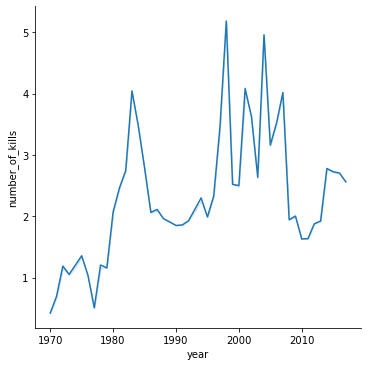

In [13]:
# Number of kills each year
fig = plt.figure(figsize=(15, 3))
sns.relplot(x="year", y="number_of_kills", kind="line",ci=False, data=df)

Most kills are in 1998, a spiking trend is obsereved throughout

<AxesSubplot:xlabel='region'>

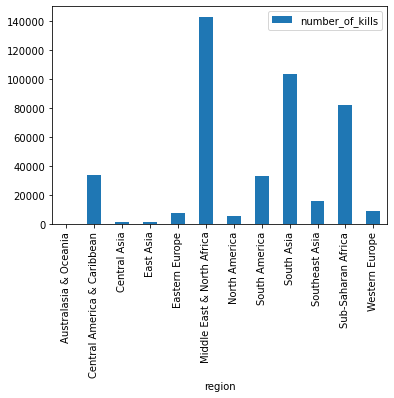

In [14]:
# regionwise number of kills
df.groupby('region')['number_of_kills'].sum().plot(kind='bar',legend=True)

Most people have died in Middle East and africa region, as noted above Central America and Caribbean have lower kill count.

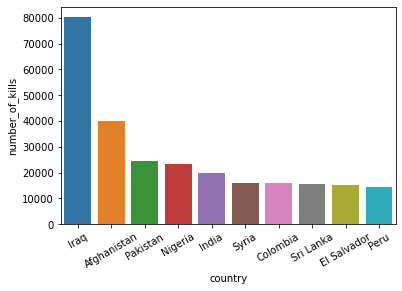

In [15]:
# country vs kills
newdf=df.groupby(by='country')['number_of_kills'].sum().sort_values(ascending=False)[:10]
newdf=pd.DataFrame(newdf)
newdf.reset_index(inplace=True)
sns.barplot(x=newdf['country'],y=newdf['number_of_kills'],data=newdf)
plt.xticks(rotation=30)
plt.show()

Most people are killed in Iraq which comes under Middle East region.

<AxesSubplot:ylabel='attacktype'>

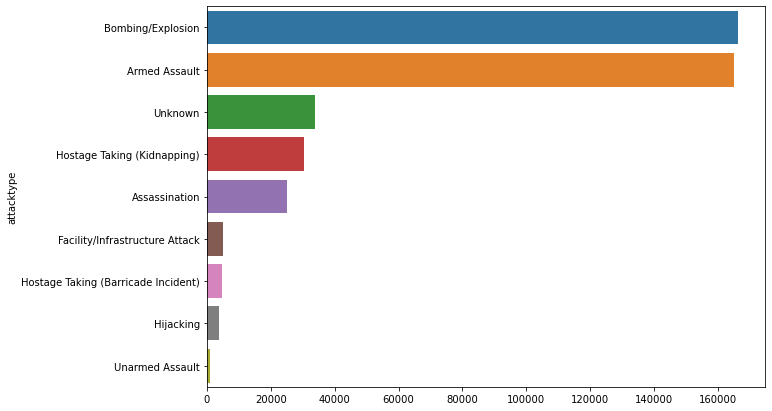

In [16]:
# attack type vs number of kills
fig=plt.figure(figsize=(10,7))
sns.barplot(y=df.groupby(by='attacktype')['number_of_kills'].sum().sort_values(ascending=False)[:10].index,
            x=df.groupby(by='attacktype')['number_of_kills'].sum().sort_values(ascending=False)[:10].values)

It is obsereved that bombing/explosions, armed attacks are lethal. 

    '''                    
import plotly.express as px
fig = px.scatter_geo(df, lat="latitude",lon='longitude',
                     color="number_of_kills",
                     hover_name="country", size="number_of_kills",
                     projection="natural earth")
fig.show()
'''
#### The output of this command is below

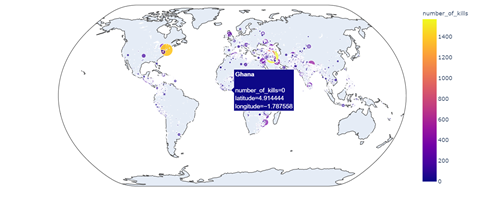

Conclusion:
- Most people are killed in middle east region as is imminent from terror groups throughout history and more recently ISIS 
- Most common form of attack used by terror groups is bombing/ explosion and armed attacks

### HOT ZONE- IRAQ, AFGHANISTAN